# Prelude

## Import Packages

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

In [5]:
import functions.init_logger
import logging
logger = logging.getLogger(__name__)
logger.setLevel(logging.CRITICAL)

In [6]:
import functions.add_path
import functions.et_condition_df as condition_df

import functions.plotnine_theme
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
from plotnine import *
from plotnine.data import *


import be_load

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5

2018-08-15 17:35:30 - OpenGL.acceleratesupport                                          - INFO     - No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'
reached exception:pyaudio
2018-08-15 17:35:31 - lib.pupil.pupil_src.shared_modules.calibration_routines.optimization_calibration.build - INFO     - Building extension modules...
reached exception:optimization_calibration
reached exception:glfw.GLFW_PRESS
reached exception:glfw.GLFW_KEY_SPACE
reached exception:glfw.GLFW_KEY_F
reached exception:glfw.glfwSetKeyCallback
reached exception:fingertip_calibration
reached exception:glfw.GLFW_PRESS
reached exception:natural_features_calibration
2018-08-15 17:35:31 - lib.pupil.pupil_src.shared_modules.calibration_routines.optimization_calibration.build - INFO     - Building extension modules...
reached exception:optimization_calibration
2018-08-15 17:35:32 - calibration_routines.optimization_calibration.build               - INFO     - Building extension modules...
reached exc

In [7]:
import os
print(os.getcwd())
if os.getcwd()[-4:] != 'code':
    try:
        os.chdir('./code')
    except:
        os.chdir('/net/store/nbp/users/behinger/projects/etcomp/code')


/net/store/nbp/users/behinger/projects/etcomp/lib/pupil/pupil_src/shared_modules/calibration_routines/optimization_calibration


## Load Data

In [8]:
(etsamples,etmsgs,etevents) = be_load.load_data()

loading subject VP1 with et el
loading subject VP1 with et pl
loading subject VP2 with et el
loading subject VP2 with et pl
loading subject VP3 with et el
loading subject VP3 with et pl
loading subject VP4 with et el
loading subject VP4 with et pl
loading subject VP11 with et el
loading subject VP11 with et pl
loading subject VP12 with et el
loading subject VP12 with et pl
loading subject VP14 with et el
loading subject VP14 with et pl
loading subject VP15 with et el
loading subject VP15 with et pl
loading subject VP19 with et el
loading subject VP19 with et pl
loading subject VP20 with et el
loading subject VP20 with et pl
loading subject VP22 with et el
loading subject VP22 with et pl
loading subject VP23 with et el
loading subject VP23 with et pl
loading subject VP24 with et el
loading subject VP24 with et pl
loading subject VP25 with et el
loading subject VP25 with et pl
loading subject VP26 with et el
loading subject VP26 with et pl
loading subject results with et el
File b'/net/s

In [9]:
import BLINK
import SMOOTH
import LARGE_GRID
import LARGE_and_SMALL_GRID
import FREEVIEW
import LUM
import MICROSACC

In [10]:
print(etsamples.subject.unique())
print("There are %i subjects"%(etsamples.subject.unique().shape))

['VP1' 'VP2' 'VP3' 'VP4' 'VP11' 'VP12' 'VP14' 'VP15' 'VP19' 'VP20' 'VP22'
 'VP23' 'VP24' 'VP25' 'VP26']
There are 15 subjects


# Large Grid

## Load Data

In [13]:
(etsamples_grid,etmsgs_grid,etevents_grid) = be_load.load_data(algorithm='hmmnosmooth_')
raw_large_grid_df = condition_df.get_condition_df(data=(etsamples_grid,etmsgs_grid,etevents_grid),condition='LARGE_GRID')

loading subject VP1 with et el
loading subject VP1 with et pl
loading subject VP2 with et el
loading subject VP2 with et pl
loading subject VP3 with et el
loading subject VP3 with et pl
loading subject VP4 with et el
loading subject VP4 with et pl
loading subject VP11 with et el
loading subject VP11 with et pl
loading subject VP12 with et el
loading subject VP12 with et pl
loading subject VP14 with et el
loading subject VP14 with et pl
loading subject VP15 with et el
loading subject VP15 with et pl
loading subject VP19 with et el
loading subject VP19 with et pl
loading subject VP20 with et el
loading subject VP20 with et pl
loading subject VP22 with et el
loading subject VP22 with et pl
loading subject VP23 with et el
loading subject VP23 with et pl
loading subject VP24 with et el
loading subject VP24 with et pl
loading subject VP25 with et el
loading subject VP25 with et pl
loading subject VP26 with et el
loading subject VP26 with et pl
loading subject results with et el
File b'/net/s

## Methods

#### Single Trial view

In [33]:
raw_large_grid_df.iloc[1:2]

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_bin : Removed 97 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


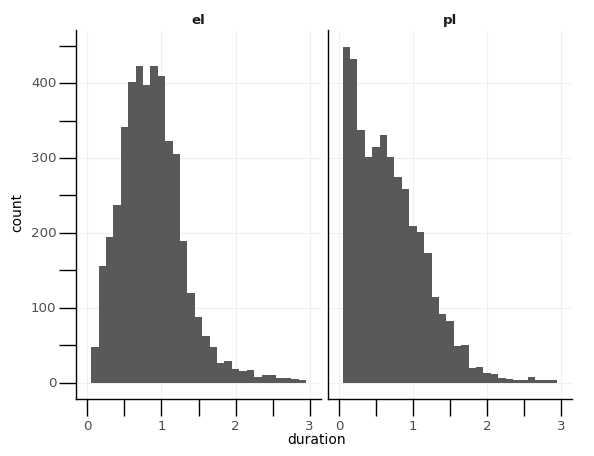

<ggplot: (-9223363299287449484)>

In [114]:
ggplot(raw_large_grid_df,aes(x="duration"))+geom_histogram(binwidth=0.1)+xlim((0,3))+facet_grid("~eyetracker")

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


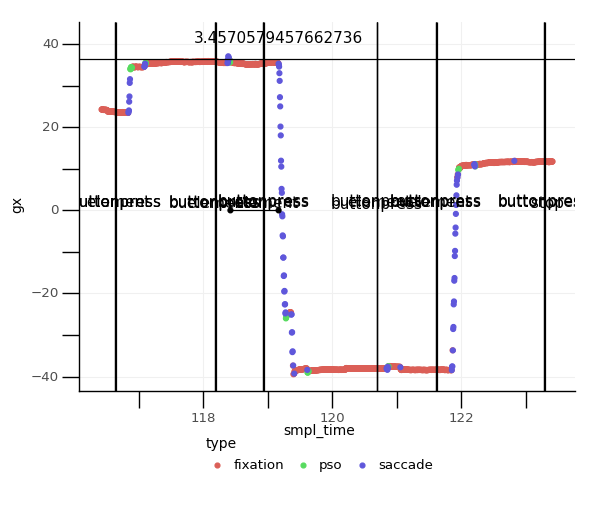

<ggplot: (-9223363299354801208)>

In [123]:
from functions import et_helper
et_helper.plot_around_event(etsamples_grid,etmsgs_grid,etevents_grid,raw_large_grid_df.query("eyetracker=='pl'&subject=='VP1'&block==1").iloc[-5],plusminus=(-2,5))

## Results

#### Accuracy Table

In [10]:
LARGE_GRID.make_table_accuracy(raw_large_grid_df)

,mean,median,horizontal_mean,vertical_mean,subject_min_accuracy,subject_max_accuracy,mean_rms
EyeLink,1.25722,1.00374,0.90134,0.928133,0.621138,3.32787,0.105255
Pupil Labs,1.62341,1.32028,1.14565,1.29937,0.914179,4.06802,0.079189


#### Accuracy Plots

1. Take mean accuracy over grid-elements
2. Take **median** block accuracy for each subject

In [50]:
LARGE_GRID.plot_accuracy_be(raw_large_grid_df)+ggtitle("Median-Block of Mean-Element Accuracy")

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

<ggplot: (-9223363269414735451)>

1. Take mean accuracy over grid-elements
2. Take **mean** block accuracy for each subject

In [51]:
LARGE_GRID.plot_accuracy(raw_large_grid_df)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

#### Single Subject Grid

In [13]:
LARGE_GRID.display_fixations(raw_large_grid_df, option='offset',input_subject="VP1",input_block=1)

FigureCanvasNbAgg()

FigureCanvasNbAgg()

#### Grid element centered plot

In [14]:
LARGE_GRID.display_fixation_centered(raw_large_grid_df)+xlim((-10,10))+ylim((-10,10))

FigureCanvasNbAgg()

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 124 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


<ggplot: (-9223363269361063715)>

#### Engbert vs. HMM
This can be thought of a precursor to compare different pupillabs detection algorithms e.g. (3D vs 2D)

In [15]:
(etsamples_engbert,etmsgs_engbert,etevents_engbert) = be_load.load_data(algorithm='')
raw_large_grid_df_engbert = condition_df.get_condition_df(data=(etsamples_engbert,etmsgs_engbert,etevents_engbert),condition='LARGE_GRID')

loading subject VP1 with et el
loading subject VP1 with et pl
loading subject VP2 with et el
loading subject VP2 with et pl
loading subject VP3 with et el
loading subject VP3 with et pl
loading subject VP4 with et el
loading subject VP4 with et pl
loading subject VP11 with et el
loading subject VP11 with et pl
loading subject VP12 with et el
loading subject VP12 with et pl
loading subject VP14 with et el
loading subject VP14 with et pl
loading subject VP15 with et el
loading subject VP15 with et pl
loading subject VP19 with et el
loading subject VP19 with et pl
loading subject VP20 with et el
loading subject VP20 with et pl
loading subject VP22 with et el
loading subject VP22 with et pl
loading subject VP23 with et el
loading subject VP23 with et pl
loading subject VP24 with et el
loading subject VP24 with et pl
loading subject VP25 with et el
loading subject VP25 with et pl
loading subject VP26 with et el
loading subject VP26 with et pl
loading subject results with et el
File b'/net/s

In [16]:
GRID_accuracy_table = pd.concat(
    [LARGE_GRID.make_table_accuracy(raw_large_grid_df).assign(        algorithm='hmm_nosmooth'),
     LARGE_GRID.make_table_accuracy(raw_large_grid_df_engbert).assign(algorithm='engbert'     )])
GRID_accuracy_table

,mean,median,horizontal_mean,vertical_mean,subject_min_accuracy,subject_max_accuracy,mean_rms,algorithm
EyeLink,1.25722,1.00374,0.90134,0.928133,0.621138,3.32787,0.105255,hmm_nosmooth
Pupil Labs,1.62341,1.32028,1.14565,1.29937,0.914179,4.06802,0.079189,hmm_nosmooth
EyeLink,1.15595,0.966056,0.872415,0.92759,0.602418,3.22539,0.0482282,engbert
Pupil Labs,1.69143,1.34125,1.14853,1.41251,0.958829,4.27488,0.237145,engbert


## Statistical Model Tests (Beta)

In [17]:
from pymer4.models import Lmer
mres = Lmer("accuracy~1+et+(1+et|subject/block)",data=raw_large_grid_df)
mres.fit()

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/rpy2/robjects/pandas2ri.py:57: UserWarning: Error while trying to convert the column "block". Fall back to string conversion. The error is: Converting pandas "Category" series to R factor is only possible when categories are strings.
  (name, str(e)))


Formula: accuracy~1+et+(1+et|subject/block)

Family: gaussian	 Inference: parametric

Number of observations: 8877	 Groups: {'block:subject': 90.0, 'subject': 15.0}

Log-likelihood: -23972.025 	 AIC: 47944.049

Random effects:

                       Name     Var    Std
block:subject   (Intercept)   2.632  1.622
block:subject  etPupil Labs   0.124  0.352
subject         (Intercept)   0.043  0.207
subject        etPupil Labs   0.113  0.336
Residual                     12.524  3.539

                       IV1           IV2   Corr
block:subject  (Intercept)  etPupil Labs  0.416
subject        (Intercept)  etPupil Labs -0.822

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),1.256,0.890,1.623,0.187,13.998,6.722,0.000,***
etPupil Labs,0.378,0.142,0.615,0.121,14.018,3.137,0.007,**


In [18]:
ggplot(mres.data.assign(idx=list(range(mres.data.shape[0]))),aes(x="idx",y="residuals",color='subject',shape="et"))+geom_point()

FigureCanvasNbAgg()

<ggplot: (8767458570525)>

In [19]:
%load_ext rpy2.ipython
%Rpush raw_large_grid_df

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/rpy2/robjects/pandas2ri.py:57: UserWarning: Error while trying to convert the column "block". Fall back to string conversion. The error is: Converting pandas "Category" series to R factor is only possible when categories are strings.
  (name, str(e)))


In [20]:
%%R
library(lme4)
raw_large_grid_df$et = factor(raw_large_grid_df$et)
contrasts(raw_large_grid_df$et)=c(-0.5,0.5)
mres <- lmer(accuracy ~ 1+et +  ( 1 + et | subject/block ) ,data = raw_large_grid_df)
summary(mres)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: accuracy ~ 1 + et + (1 + et | subject/block)
   Data: raw_large_grid_df

REML criterion at convergence: 47944

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-4.187 -0.172 -0.056  0.077 46.613 

Random effects:
 Groups        Name        Variance Std.Dev. Corr 
 block:subject (Intercept)  2.90081 1.7032        
               et1          0.12414 0.3523   0.50 
 subject       (Intercept)  0.01395 0.1181        
               et1          0.11263 0.3356   -0.02
 Residual                  12.52388 3.5389        
Number of obs: 8877, groups:  block:subject, 90; subject, 15

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   1.4456     0.1859 14.0080   7.775  1.9e-06 ***
et1           0.3782     0.1206 14.0190   3.137  0.00727 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
    (Intr)
et1 0.146 


In [21]:
%%R
library(robustlmm)
rmres <- rlmer(accuracy ~ 1+et +  ( 1 + et | subject/block ) ,data = raw_large_grid_df,verbose=0)
summary(rmres)

In [47]:
%%R
summary(rmres)

Robust linear mixed model fit by DAStau 
Formula: accuracy ~ 1 + et + (1 + et | subject/block) 
   Data: raw_large_grid_df 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-14.706  -0.643  -0.083   0.619 265.844 

Random effects:
 Groups        Name        Variance  Std.Dev. Corr
 block:subject (Intercept) 5.847e-02 0.24181      
               et1         1.384e-01 0.37208  0.62
 subject       (Intercept) 5.822e-05 0.00763      
               et1         1.954e-02 0.13980  1.00
 Residual                  3.936e-01 0.62734      
Number of obs: 8877, groups: block:subject, 90; subject, 15

Fixed effects:
            Estimate Std. Error t value
(Intercept)  0.98514    0.02730   36.09
et1          0.35238    0.05678    6.21

Correlation of Fixed Effects:
    (Intr)
et1 0.480 

Robustness weights for the residuals: 
 7107 weights are ~= 1. The remaining 1770 ones are summarized as
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00506 0.47300 0.73500 0.66000 0.91000 0.99900

Hit <Return> to see next plot:  
Hit <Return> to see next plot:  
Hit <Return> to see next plot:  
Hit <Return> to see next plot:  
Hit <Return> to see next plot:  


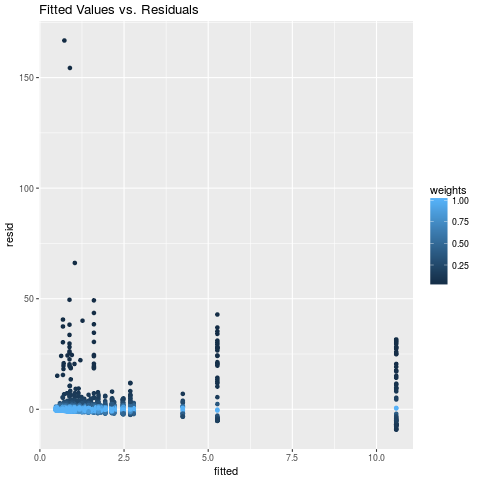

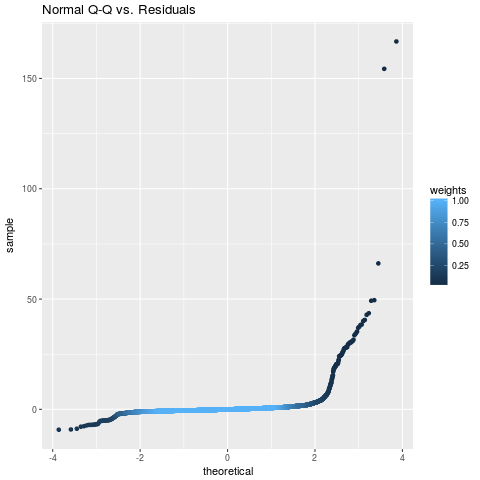

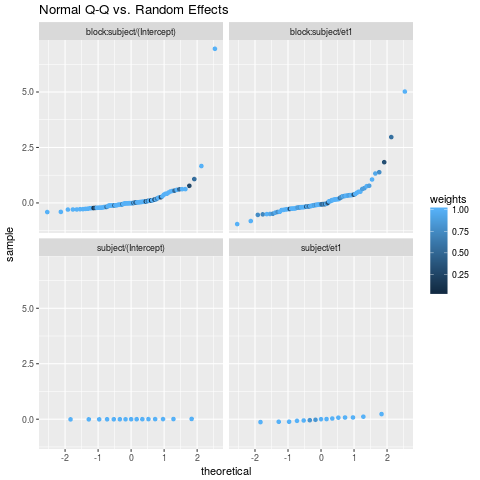

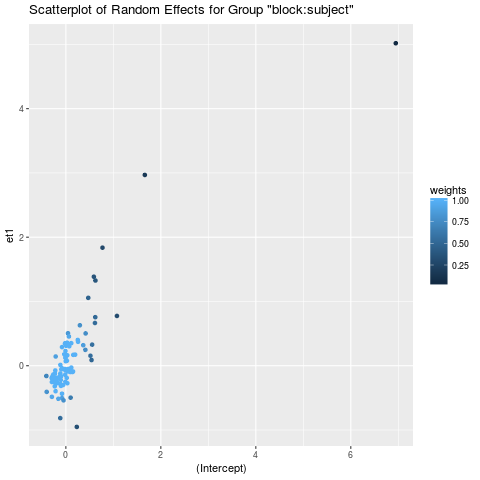

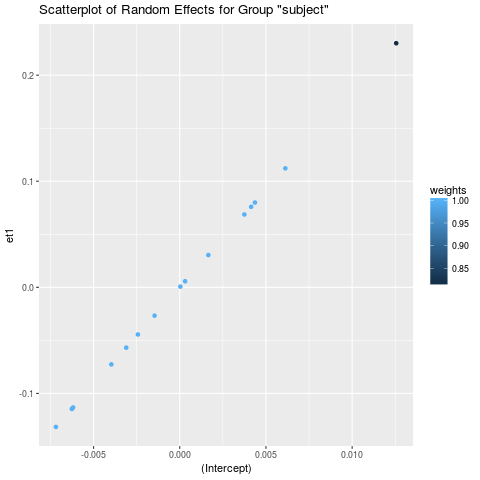

In [49]:
%%R
plot(rmres)

# Blinks

## Load Data

In [22]:
#%% Do Blink Analysis
blink= condition_df.get_condition_df(data=(etsamples,etmsgs,etevents),condition="BLINK")

2018-08-15 13:47:16 - functions.et_condition_df                                         - DEBUG    - Data already loaded, just applying transformations
2018-08-15 13:47:17 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP1 


/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2018-08-15 13:47:20 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP1 
2018-08-15 13:47:21 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP2 
2018-08-15 13:47:22 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP2 
2018-08-15 13:47:23 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP3 
2018-08-15 13:47:24 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP3 
2018-08-15 13:47:26 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP4 
2018-08-15 13:47:27 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP4 
2018-08-15 13:47:28 - functions.et_condition_df                      

## Results

#### Number of Blinks

In [52]:
BLINK.plot_count(blink)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 1 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume

FigureCanvasNbAgg()

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_jitter : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


#### Duration of Blinks

In [53]:
BLINK.plot_duration(blink)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

#### Subject-wise number + duration

In [54]:
BLINK.plot_count(blink,option="facet_subjects")

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_jitter : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


In [55]:
BLINK.plot_duration(blink,option="facet_subjects")

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

# Smooth Pursuit

## Load Smooth Data

In [27]:
# this loads the bayesian model results
cfg = {'redo':False} # should be specified in the beginning of the notebook
if cfg['redo']:
    smoothresult = SMOOTH.fit_bayesian_model(etsamples,etmsgs,etevents)
    SMOOTH.save_smooth(smoothresult)
else:
    smoothresult = SMOOTH.load_smooth()

In [28]:
# this is the data per subject
smooth = condition_df.get_condition_df(data=(etsamples,etmsgs,etevents),condition="SMOOTHPURSUIT")

2018-08-15 13:47:58 - functions.et_condition_df                                         - DEBUG    - Data already loaded, just applying transformations
2018-08-15 13:47:59 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP1 
2018-08-15 13:48:00 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP1 
2018-08-15 13:48:00 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP2 
2018-08-15 13:48:01 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP2 
2018-08-15 13:48:02 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP3 
2018-08-15 13:48:03 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP3 
2018-08-15 13:48:03 - functions.et_condition_df   

## Methods

#### Single Trial Modelfit

In [29]:
smooth_stanmodel = SMOOTH.compileModel() # to facilitate plotting 

In [62]:
plt.rcParams['figure.figsize'] = [15, 10]

In [70]:
plt.figure()
fitA = SMOOTH.plot_single_trial(etsamples,etmsgs,None,'VP3','el',10,4,smooth_stanmodel) # trial 1, block 1
fitB = SMOOTH.plot_single_trial(etsamples,etmsgs,None,'VP3','pl',10,4,smooth_stanmodel) # trial 1, block 1

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

msg 0 from 1


/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


msg 0 from 1


Main Results follow. First latency, then estimated velocity

## Results

#### Initial Latency

In [57]:
SMOOTH.plot_init_latency(smoothresult,option="")

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

In [58]:
SMOOTH.plot_init_latency(smoothresult,option="difference")

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

#### Catchup Saccade Amplitudes

In [73]:
SMOOTH.plot_catchup_amplitudes(smooth)+expand_limits(y = 0)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

<ggplot: (-9223363269422247466)>

# Microsaccades

## Detect Microsaccades

In [34]:
microsaccades = MICROSACC.detect_microsaccades(etsamples=etsamples,etmsgs=etmsgs,etevents=etevents)

2018-08-15 13:49:09 - MICROSACC                                                         - INFO     - subject==@subject&eyetracker==@eyetracker


/net/store/nbp/users/behinger/projects/etcomp/code/functions/et_helper.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  eventstart.loc[eventstart < mintime] = mintime
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/net/store/nbp/users/behinger/projects/etcomp/code/functions/et_helper.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

2018-08-15 13:49:11 - functions.detect_saccades                                         - DEBUG    - eyetracker: el
2018-08-15 13:49:11 - functions.detect_saccades                                         - DEBUG    - removing bad-samples for saccade detection
2018-08-15 13:49:11 - functions.detect_saccades                                         - DEBUG    - Start.... Detecting Saccades
2018-08-15 13:49:11 - functions.detect_saccades                                         - WARNING  - Std of velocity data [0.0229 0.0193]
2018-08-15 13:49:12 - functions.detect_saccades                                         - WARNING  - Mean overthreshold values: 0.0199
2018-08-15 13:49:12 - functions.detect_saccades                                         - WARNING  - Number of saccades detected: (110, 2)
0
2018-08-15 13:49:12 - functions.detect_saccades                                         - DEBUG    - Done... Detecting Saccades
2018-08-15 13:49:12 - MICROSACC                                     

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


2018-08-15 13:49:22 - functions.detect_saccades                                         - DEBUG    - Done... Detecting Saccades
2018-08-15 13:49:22 - MICROSACC                                                         - INFO     - Removed 0 saccades larger than amplitude 2°
2018-08-15 13:49:22 - functions.et_condition_df                                         - DEBUG    - Data already loaded, just applying transformations
2018-08-15 13:49:22 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP1 
2018-08-15 13:49:22 - root                                                              - DEBUG    - dtypes of the df before: duration         float64
end_gx           float64
end_gy           float64
end_time         float64
peak_velocity    float64
start_gx         float64
start_gy         float64
start_time       float64
amplitude        float64
type              object
angle            float64
block            float64
condition       

## Results

In [74]:
# 6 blocks x 20s
MICROSACC.plot_default(microsaccades,subtype="count/(6*20)")+ylab("microsaccaderate [1/s]")

Index(['eyetracker', 'subject', 'count', 'amplitude mean'], dtype='object')


/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

<ggplot: (-9223363269422472188)>

It is highly unlikely to have ~7 microsaccades per second. Pupillabs eyetracker does not seem able to find microsaccades without tweaking the algorithm.

In [75]:
MICROSACC.plot_default(microsaccades,subtype="amplitude mean")

Index(['eyetracker', 'subject', 'count', 'amplitude mean'], dtype='object')


/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

<ggplot: (8767432639040)>

In [76]:
MICROSACC.plot_densities(microsaccades)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

<ggplot: (8767432305230)>

In [79]:
MICROSACC.plot_mainsequence(microsaccades)+coord_cartesian(xlim=(-3,1))

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

<ggplot: (8767432031510)>

# Pupil Dilation

## Processing

In [39]:
all_lum = LUM.process_lum(etsamples,etmsgs)
all_lum_binned = LUM.bin_lum(all_lum)

subject:VP1, et:pl
msg 0 from 48
subject:VP1, et:el
msg 0 from 48
subject:VP2, et:pl
msg 0 from 48
subject:VP2, et:el
msg 0 from 48
trial has no baseline
trial has no baseline
trial has no baseline
subject:VP3, et:pl
msg 0 from 48
subject:VP3, et:el
msg 0 from 48
subject:VP4, et:pl
msg 0 from 48
subject:VP4, et:el
msg 0 from 48
subject:VP11, et:pl
msg 0 from 48
subject:VP11, et:el
msg 0 from 48
subject:VP12, et:pl
msg 0 from 48
subject:VP12, et:el
msg 0 from 48
subject:VP14, et:pl
msg 0 from 48
subject:VP14, et:el
msg 0 from 48
subject:VP15, et:pl
msg 0 from 48
subject:VP15, et:el
msg 0 from 48
subject:VP19, et:pl
msg 0 from 48
subject:VP19, et:el
msg 0 from 48
subject:VP20, et:pl
msg 0 from 48
subject:VP20, et:el
msg 0 from 48
subject:VP22, et:pl
msg 0 from 48
subject:VP22, et:el
msg 0 from 48
subject:VP23, et:pl
msg 0 from 48
2018-08-15 13:53:46 - functions.et_make_df                                              - WARNING  - warning, no sample found for msg 8
2018-08-15 13:53:46 - fu

## Results

In [80]:
LUM.plot_time_all(all_lum_binned)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 5520 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_vline : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


<ggplot: (8767431718762)>

In [81]:
LUM.plot_time_diff(all_lum_binned,subject="VP3")

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/geoms/geom_path.py:75: UserWarning: geom_path: Removed 46 rows containing missing values.
  warn(msg.format(n1-n2))
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_vline : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/guides/guides.py:200: UserWarning: Cannot generate legend for the 'shape' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


<ggplot: (-9223363269423133219)>

In [82]:
LUM.plot_mean(all_lum)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 2 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


<ggplot: (8767437556477)>

In [83]:
LUM.plot_diff(all_lum)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 10 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

<ggplot: (8767437869853)>

In [85]:
(ggplot(all_lum,aes(x="td",y="gx",color="subject"))+stat_summary(geom="line"))

KeyboardInterrupt: 

In [86]:
(ggplot(all_lum.query("subject=='VP3'"),aes(x="td",y="gx",color="subject"))+stat_summary(geom="line"))

KeyboardInterrupt: 

In [89]:
all_lum.iloc[0:1]

,gy,gx,smpl_time,pa,gx_vel,gy_vel,type,confidence,outside,zero_pa,neg_time,blink_id,algorithm,eyetracker,subject,...,condition,element,exp_event,grid_size,lum,msg_time,pic_id,posx,posy,shake_x,shake_y,trial,vel,beep,pa_norm
1198540,-3.76735,-3.852275,392.939353,4226.931024,NaN,NaN,fixation,1.0,False,False,False,0,hmm,pl,VP1,...,DILATION,NaN,lum,NaN,0.0,393.93654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.998108


In [3]:
#all_lum.loc[:,'plot_grouping'] = all_lum.block.map(str) + all_lum.lum.map(str)
(ggplot(all_lum_binned.query("lum>0&subject=='VP3'"),aes(x="td",y="gy"))+geom_smooth(method='loess'))+facet_wrap("~eyetracker")+xlim(-1,4)

NameError: name 'ggplot' is not defined

# Freeviewing

In [ ]:
# Freeviewing
raw_freeview_df, raw_fix_count_df = condition_df.get_condition_df(data=(etsamples_grid,etmsgs_grid,etevents_grid), condition='FREEVIEW')

In [108]:
(etsamples_engbert,etmsgs_engbert,etevents_engbert) = be_load.load_data(algorithm='')
raw_freeview_df, raw_fix_count_df  = condition_df.get_condition_df(data=(etsamples_engbert,etmsgs_engbert,etevents_engbert),condition='FREEVIEW')

loading subject VP1 with et el
loading subject VP1 with et pl
loading subject VP2 with et el
loading subject VP2 with et pl
loading subject VP3 with et el
loading subject VP3 with et pl
loading subject VP4 with et el
loading subject VP4 with et pl
loading subject VP11 with et el
loading subject VP11 with et pl
loading subject VP12 with et el
loading subject VP12 with et pl
loading subject VP14 with et el
loading subject VP14 with et pl
loading subject VP15 with et el
loading subject VP15 with et pl
loading subject VP19 with et el
loading subject VP19 with et pl
loading subject VP20 with et el
loading subject VP20 with et pl
loading subject VP22 with et el
loading subject VP22 with et pl
loading subject VP23 with et el
loading subject VP23 with et pl
loading subject VP24 with et el
loading subject VP24 with et pl
loading subject VP25 with et el
loading subject VP25 with et pl
loading subject VP26 with et el
loading subject VP26 with et pl
loading subject results with et el
File b'/net/s

KeyboardInterrupt: 

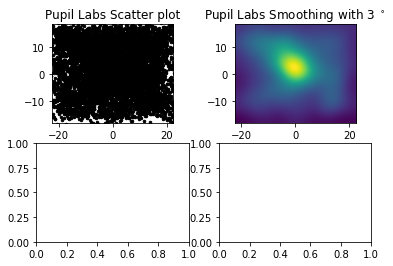

In [106]:
# plot the fixations as a heatmap
# TODO annotation how many fixations from how many pictures are used for each eyetracker
FREEVIEW.plot_heatmap(raw_freeview_df,raw_fix_count_df)

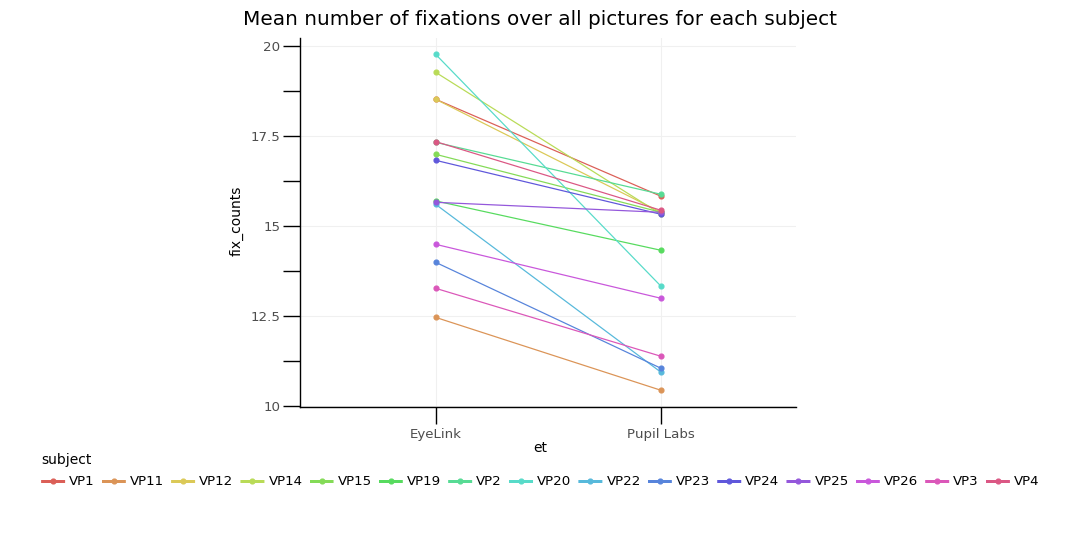

In [109]:
# plot fixation counts
FREEVIEW.plot_number_of_fixations(raw_fix_count_df, option=None)

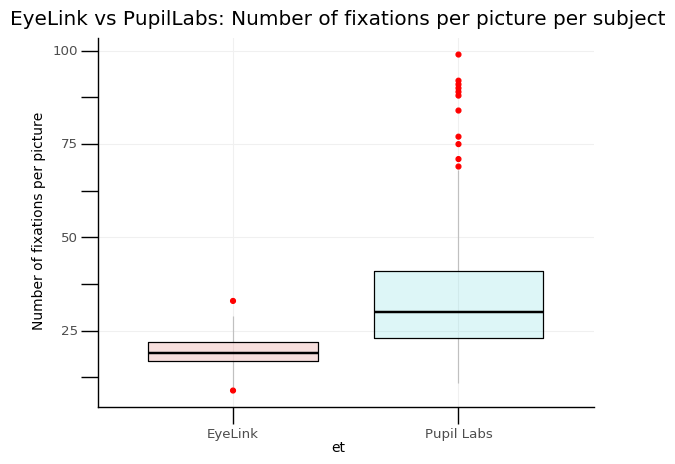

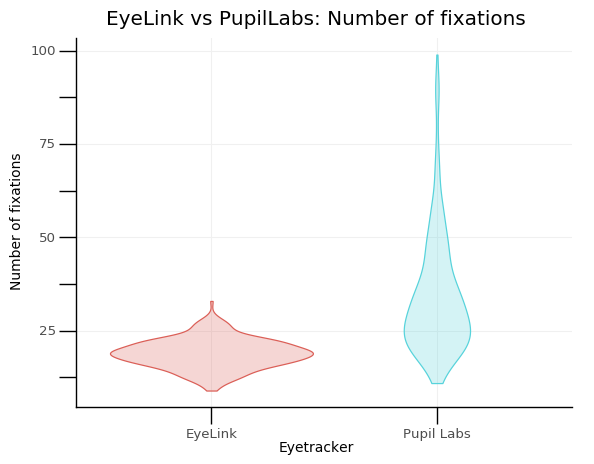

In [100]:
FREEVIEW.plot_number_of_fixations(raw_fix_count_df, option='eyetracker')

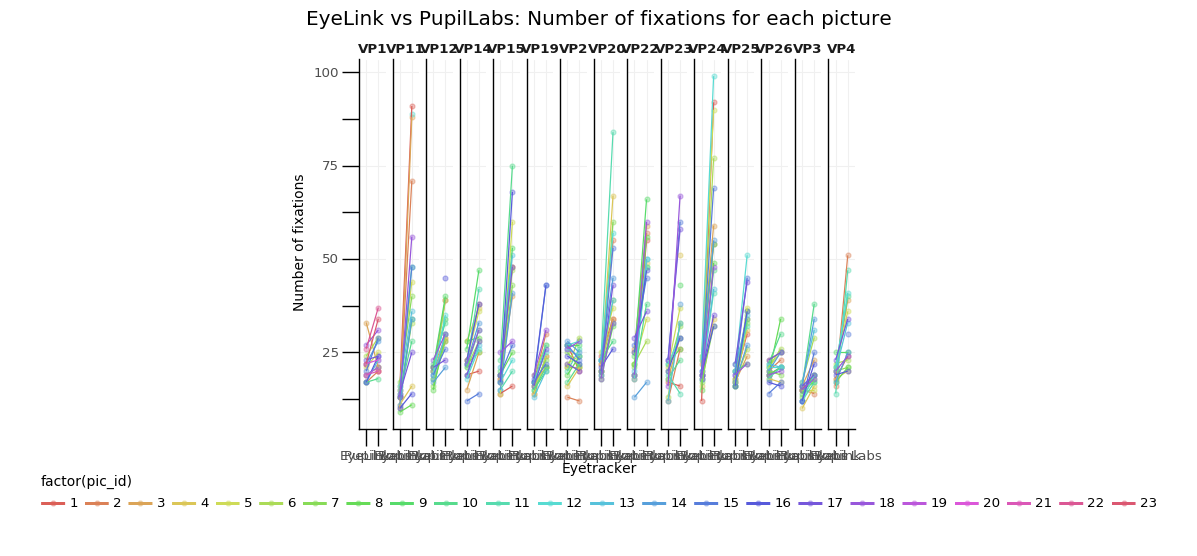

In [101]:
FREEVIEW.plot_number_of_fixations(raw_fix_count_df, option='facet_subjects')

In [103]:
# plot histogram of the counts
FREEVIEW.plot_histogram(raw_fix_count_df)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_density : Removed 166 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


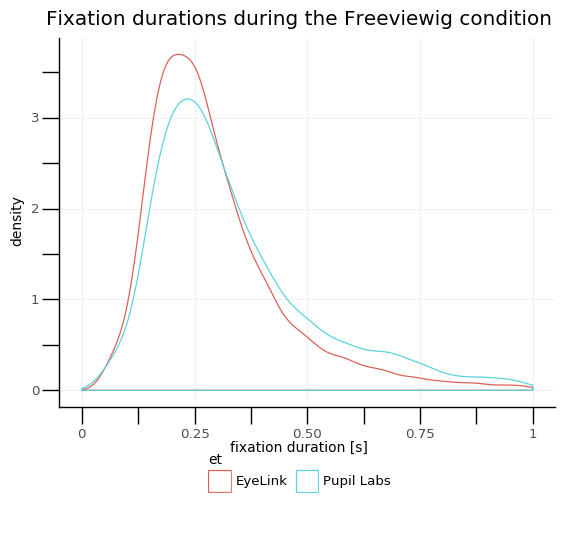

In [110]:
# plot fixation durations
FREEVIEW.plot_fixation_durations(raw_freeview_df)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_density : Removed 47 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


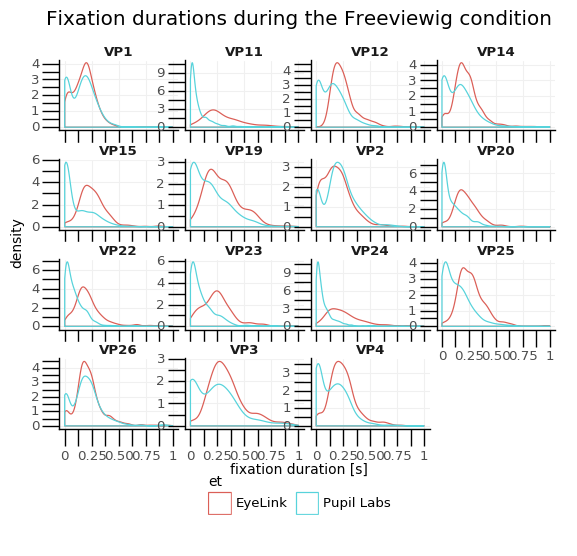

In [105]:
FREEVIEW.plot_fixation_durations(raw_freeview_df, option='facet_subjects')

In [ ]:
# TODO plot main sequence
FREEVIEW.plot_main_sequence(raw_freeview_df)

# Large Grid

In [28]:
#test = raw_large_grid_df.query("subject in ['VP1', 'VP3']")
LARGE_GRID.plot_accuracy(raw_large_grid_df, option='dodge')

FigureCanvasNbAgg()

In [38]:
# investigate on the position and properties of detected fixations
LARGE_GRID.display_fixations(raw_large_grid_df, option='fixations')

FigureCanvasNbAgg()

FigureCanvasNbAgg()

In [61]:
%matplotlib inline

In [66]:
tmpdata = raw_large_grid_df.groupby(['eyetracker','subject','posx', 'posy'],as_index=False).mean()

In [70]:
%load_ext rpy2.ipython
%Rpush tmpdata

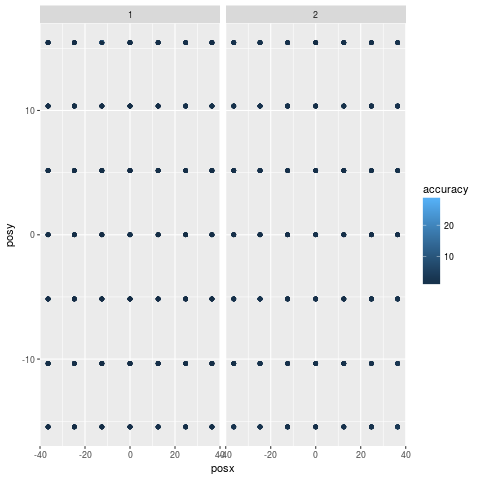

In [78]:
%%R
library(ggplot2)
ggplot(tmpdata,aes(x=posx,y=posy,color=accuracy))+geom_point()+facet_wrap(~eyetracker)

In [90]:
raw_large_grid_df.groupby(['eyetracker','subject','posx','posy']).agg("mean")

element     end_time    mean_gx  \
eyetracker subject posx       posy                                            
el         VP1     -36.412071 -15.455667  14.833333  1848.745500 -36.931490   
                              -10.356001  21.666667  1855.588500 -37.344624   
                              -5.162292   33.500000  1870.195167 -37.252236   
                               0.000000   33.833333  1869.223500 -36.981094   
                               5.162292   21.333333  1855.896500 -36.592116   
                               10.356001  29.500000  1864.794500 -36.509316   
                               15.455667  24.000000  1858.384500 -37.059264   
                   -24.751435 -15.455667  29.333333  1864.008500 -25.741788   
                              -10.356001  29.500000  1863.253833 -25.610378   
                              -5.162292   18.000000  1850.546833 -25.163641   
                               0.000000   34.500000  1870.368500 -25.083559   
                               5.162292   30.166667  1866.525167 -24.835735   
                               10.356001  26.500000  1860.761167 -24.738660   
                               15.455667  18.500000  1853.213833 -25.172511   
                   -12.495718 -15.455667  26.833333  1860.349833 -13.307056   
                              -10.356001  22.500000  1856.558500 -13.238146   
                              -5.162292   28.500000  1863.644500 -12.887852   
                               0.000000   30.000000  1863.876500 -12.738050   
                               5.162292   30.833333  1867.975167 -12.132153   
                               10.356001  23.666667  1858.602833 -12.247165   
                               15.455667  21.666667  1855.513167 -12.999219   
                    0.000000  -15.455667  21.000000  1855.901167  -0.888656   
                              -10.356001  19.333333  1852.837833  -0.582548   
                              -5.162292   36.833333  1872.364167  -0.151327   
                               0.000000   43.000000  2091.000429  -0.726699   
                               5.162292   26.166667  1861.110833   0.364351   
                               10.356001  21.166667  1854.497833   0.137806   
                               15.455667  41.166667  1878.513500  -0.660212   
                    12.495718 -15.455667  25.500000  1860.132833  11.850161   
                              -10.356001  27.500000  1860.543500  12.109762   
...                                             ...          ...        ...   
pl         VP4     -12.495718  10.356001  23.333333  1577.738278 -13.254554   
                               15.455667  25.500000  1579.677278 -13.109448   
                    0.000000  -15.455667  26.333333  1581.118578  -0.750573   
                              -10.356001  23.166667  1577.153078   0.019877   
                              -5.162292   37.000000  1593.416878  -0.389731   
                               0.000000   27.727273  1727.725114   0.747920   
                               5.162292   28.000000  1582.679578  -0.153525   
                               10.356001  24.833333  1578.584578  -0.257687   
                               15.455667  32.833333  1588.290078  -0.225417   
                    12.495718 -15.455667  24.333333  1577.878978  12.127677   
                              -10.356001  23.166667  1577.112478  13.088728   
                              -5.162292   24.666667  1578.922678  13.234913   
                               0.000000   26.000000  1580.368878  12.898833   
                               5.162292   29.000000  1583.681278  12.894494   
                               10.356001  23.333333  1577.105793  13.138642   
                               15.455667  23.000000  1576.806578  13.282024   
                    24.751435 -15.455667  25.500000  1579.320278  25.001969   
                              -10.356001  29.500000  1584.458978  25.868293   
               

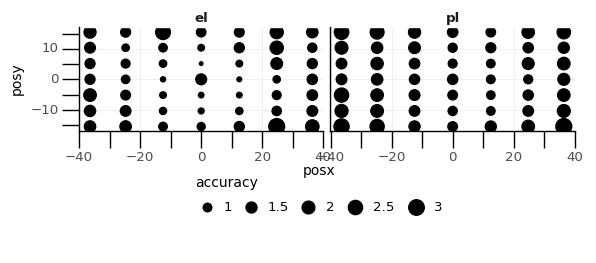

<ggplot: (-9223363299393927950)>

In [97]:
(ggplot(raw_large_grid_df.groupby(['eyetracker','posx','posy'],as_index=False).mean(),aes(x="posx",y="posy",size="accuracy"))+geom_point()+facet_wrap("~eyetracker"))+coord_fixed()

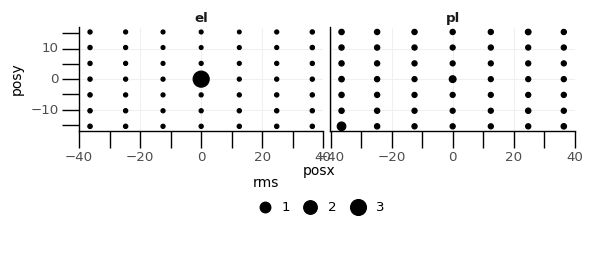

<ggplot: (8737460845867)>

In [98]:
(ggplot(raw_large_grid_df.groupby(['eyetracker','posx','posy'],as_index=False).mean(),aes(x="posx",y="posy",size="rms"))+geom_point()+facet_wrap("~eyetracker"))+coord_fixed()

In [ ]:
import CALIBRATION

'VP2'

In [442]:
err = pd.DataFrame()

for subject in etsamples.subject.unique():
    err = pd.concat([err,CALIBRATION.pl_accuracy(subject),CALIBRATION.el_accuracy(subject)],ignore_index=True)
err.loc[:,'avg'] = err.avg.astype(float)
err.loc[:,'msg_time'] = err.msg_time.astype(float) 

loading subject VP1
found 7 calibrations
2018-08-17 17:44:41 - camera_models                                                     - INFO     - No user calibration found for camera Pupil Cam1 ID2 at resolution (1280, 720)
2018-08-17 17:44:42 - camera_models                                                     - INFO     - Loading pre-recorded calibration
2018-08-17 17:44:42 - calibration_routines.finish_calibration                           - INFO     - Dismissing 0.48% pupil data due to confidence < 0.60
2018-08-17 17:44:42 - calibration_routines.finish_calibration                           - INFO     - Collected 390 monocular calibration data.
2018-08-17 17:44:42 - calibration_routines.finish_calibration                           - INFO     - Collected 390 binocular calibration data.
2018-08-17 17:44:43 - calibration_routines.calibrate                                    - INFO     - first iteration. root-mean-square residuals: 17.612913834162562, in pixel
2018-08-17 17:44:43 - calibrati

/net/store/nbp/users/behinger/projects/etcomp/lib/pupil/pupil_src/shared_modules/accuracy_visualizer.py:208: RuntimeWarning: invalid value encountered in arccos
  precision = np.sqrt(np.mean(np.arccos(succesive_distances) ** 2))


Mapping..0%
Mapping complete
2018-08-17 17:45:09 - calibration_routines.finish_calibration                           - INFO     - Dismissing 0.40% pupil data due to confidence < 0.60
2018-08-17 17:45:09 - calibration_routines.finish_calibration                           - INFO     - Collected 420 monocular calibration data.
2018-08-17 17:45:09 - calibration_routines.finish_calibration                           - INFO     - Collected 420 binocular calibration data.
2018-08-17 17:45:09 - calibration_routines.calibrate                                    - INFO     - first iteration. root-mean-square residuals: 18.162560720353618, in pixel
2018-08-17 17:45:09 - calibration_routines.calibrate                                    - INFO     - second iteration: ignoring outliers. root-mean-square residuals: 8.54911401591122 in pixel
2018-08-17 17:45:09 - calibration_routines.calibrate                                    - INFO     - used 403 data points out of the full dataset 420: subset is 95.

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/net/store/nbp/users/behinger/projects/etcomp/code/CALIBRATION.py:27: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  out = pd.concat([out,elcaliberror.iloc[minix]],axis=1)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to 

loading subject VP2
found 0 calibrations
2018-08-17 17:45:30 - camera_models                                                     - INFO     - No user calibration found for camera Pupil Cam1 ID2 at resolution (1280, 720)
2018-08-17 17:45:30 - camera_models                                                     - INFO     - Loading pre-recorded calibration
loading subject VP3
found 0 calibrations
2018-08-17 17:46:11 - camera_models                                                     - INFO     - No user calibration found for camera Pupil Cam1 ID2 at resolution (1280, 720)
2018-08-17 17:46:14 - camera_models                                                     - INFO     - Loading pre-recorded calibration
loading subject VP4
found 0 calibrations
2018-08-17 17:46:34 - camera_models                                                     - INFO     - No user calibration found for camera Pupil Cam1 ID2 at resolution (1280, 720)
2018-08-17 17:46:34 - camera_models                                     

In [443]:
err.subject.unique()

array(['VP1', 'VP2', 'VP3', 'VP4', 'VP11', 'VP12', 'VP14', 'VP15', 'VP19',
       'VP20', 'VP22', 'VP23', 'VP24', 'VP25', 'VP26'], dtype=object)

In [444]:
#ggplot(err,aes(x="msg_time"))+geom_histogram(binwidth=10)

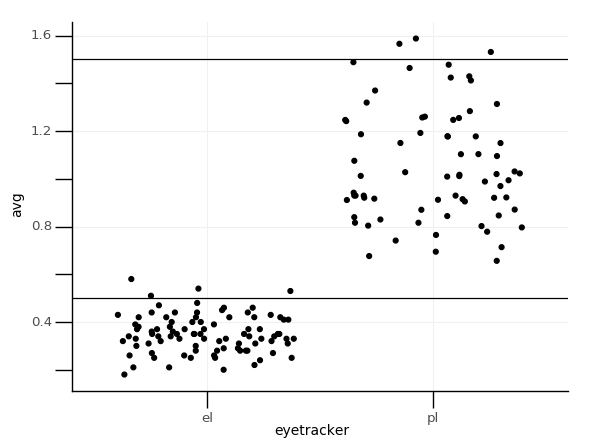

<ggplot: (-9223363300600764121)>

In [450]:
ggplot(err,aes(x="eyetracker",y="avg"))+geom_jitter()+geom_hline(yintercept=[0.5,1.5])#+facet_wrap("~subject")

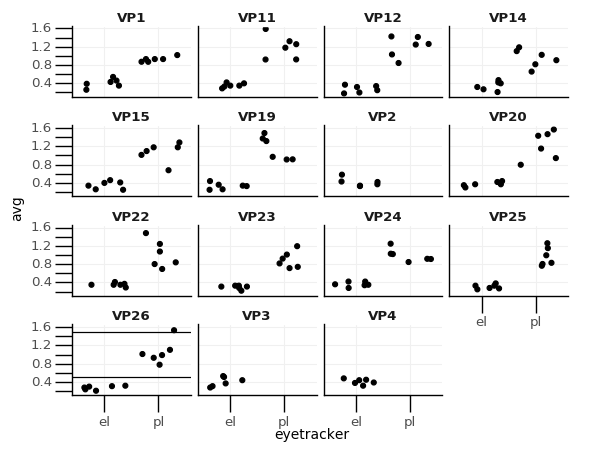

<ggplot: (-9223363300085784004)>

In [340]:
CALIBRATION.el_accuracy('VP12')

,index,msg_time,avg,max,eyetracker,subject


In [342]:
samp,evt,elnotes = raw_el_data('VP12', datapath='/net/store/nbp/projects/etcomp/')

In [349]:
elnotes["trialid "].loc[29:40]


29    !CAL Resolution (upd) at screen center: X=1.3,...
30     !CAL Gain Change Proportion: X: 0.413 Y: 0.280\n
31                    !CAL Gain Ratio (Gy/Gx) = 1.046\n
32          !CAL Cross-Gain Ratios: X=0.960, Y=0.117 \n
33     !CAL Cross-Gain too large: X=0.960, Y=0.117 \n\n
34            !CAL PCR gain ratio(x,y) = 2.500, 2.500\n
35             !CAL CR gain match(x,y) = 1.000, 1.000\n
36                  !CAL Slip rotation correction OFF\n
37              !CAL CALIBRATION HV13 R RIGHT   GOOD \n
38                                                    c
39                                                    v
40                                                    v
Name: trialid , dtype: object

# 

In [347]:
1

1

In [406]:
pldata['notifications'][522]

{'duration': 0.0,
 'label': 'Instruction for LARGEGG start block 2',
 'recent_frame_timestamp': 3024.795072,
 'record': True,
 'subject': 'trigger',
 'timestamp': 3024.838478583}

In [426]:
CALIBRATION.el_accuracy('VP1')


/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)
/net/store/nbp/users/behinger/projects/etcomp/code/CALIBRATION.py:27: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  out = pd.concat([out,elcaliberror.iloc[minix]])


,avg,eyetracker,index,max,msg_time,subject
1,0.46,el,80,0.95,1511.24,VP1
2,0.39,el,511,0.81,2242.4,VP1
3,0.35,el,942,0.82,2867.62,VP1
7,0.43,el,1528,0.71,3997.3,VP1
8,0.54,el,1929,0.79,4451.66,VP1
9,0.26,el,2329,0.78,4869.68,VP1
